# Objective
In this notebook, I am simply implementing one-vs-one models. Raw intruder data is used, however, in subsequent notebooks, SMOTE and gaussian noise methods will be implemented to preserve the privacy of the intruders. 

In [7]:
import codecs
import utility_functions_v2 as util
import one_vs_rest_util as ovr_util
import load_buffalo_data as data_loader
import cnn_lstm_models as models
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [8]:
import importlib
importlib.reload(data_loader)
importlib.reload(util)
importlib.reload(models)
importlib.reload(ovr_util)

<module 'one_vs_rest_util' from 'C:\\Users\\nyein\\Intership_proj\\keystroke_dynamics\\initial_testing_phase\\one_vs_rest_util.py'>

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Dropout,LSTM,TimeDistributed,GRU , Bidirectional,BatchNormalization,Activation
from tensorflow.keras.models import  Sequential, Model, load_model
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix
from collections import Counter
from tensorflow.keras import backend as K
from sklearn.metrics import roc_auc_score

In [10]:
seq_length = 30
cnn_units = 16
lstm_units = 15
weight_decay = 1e-6
batch_size = 64
epochs = 150
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0001)
optimizer_2 = tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-08)
loss_func = ["binary_crossentropy",models.custom_loss]
early_stopping,learning_rate_reduction = models.get_call_backs()

In [11]:
user_id = "005"
intruder_id_list = ["080","083","017","019"]

## 1. Load data

In [12]:
train_data, train_label, scaler = ovr_util.load_one_vs_rest_train_data(user_id, intruder_id_list, seq_length)
test_data, test_label = ovr_util.load_one_vs_rest_test_data(user_id, intruder_id_list, scaler, seq_length)

not found!! popping from list
not found!! popping from list
not found!! popping from list
not found!! popping from list
Train data shape: (17088, 30, 4, 1), Train label shape: (17088, 1)
Test data shape: (1200, 30, 4, 1), Multi-class Test label shape: (1200, 1)


## 3. Training

cnn_lstm configuration 3- CNN units: 16 , LSTM units: 15 
Train on 11961 samples, validate on 5127 samples
Epoch 1/150
11961/11961 [==============================] - 8s 695us/sample - loss: 0.6335 - acc: 0.6127 - auroc: 0.6628 - val_loss: 0.6289 - val_acc: 0.7347 - val_auroc: 0.8277
Epoch 2/150
11961/11961 [==============================] - 2s 164us/sample - loss: 0.5175 - acc: 0.7553 - auroc: 0.8321 - val_loss: 0.5220 - val_acc: 0.7611 - val_auroc: 0.8995
Epoch 3/150
11961/11961 [==============================] - 2s 162us/sample - loss: 0.4520 - acc: 0.8052 - auroc: 0.8746 - val_loss: 0.4016 - val_acc: 0.8204 - val_auroc: 0.9092
Epoch 4/150
11961/11961 [==============================] - 2s 161us/sample - loss: 0.4128 - acc: 0.8281 - auroc: 0.8966 - val_loss: 0.3725 - val_acc: 0.8364 - val_auroc: 0.9307
Epoch 5/150
11961/11961 [==============================] - 2s 162us/sample - loss: 0.3901 - acc: 0.8395 - auroc: 0.9070 - val_loss: 0.3221 - val_acc: 0.8648 - val_auroc: 0.9370
Epoch 6/

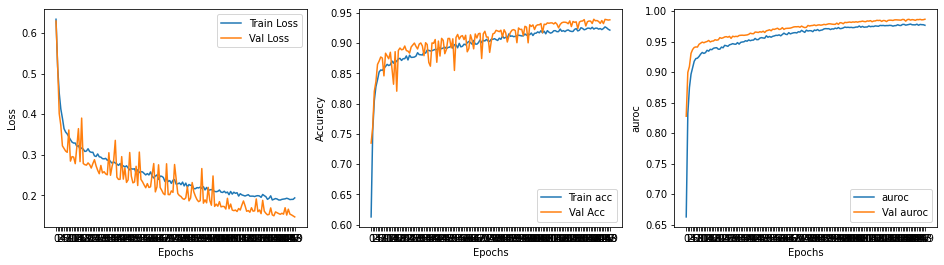

In [7]:
model_1 = models.build_cnn_lstm_model_ver3(LSTM,False,cnn_units,lstm_units,0.3,(seq_length,4,1))
history_1 = models.train_model(model_1,optimizer,loss_func[0],epochs,batch_size,train_data,train_label,[early_stopping])

## 4.Testing with unseen data

### 4.1 Testing model-1 

In [8]:
#testing cnn-lstm model-binary_crossentropy
(prediction_1,predicted_classes_1),(tn_1, fp_1, fn_1, tp_1), (FAR_1,FRR_1,EER_1) =  models.perform_testing(model_1,test_data,test_label,0.5)

TN:    523,    FP:   77,   FN:   87,   TP:   513
FAR:   0.12833333333333333,   FRR:   0.145,   EER:   0.1426229508196722


## 4.2 One vs One testing

## 5. Training with noise data

### 5.1 Load noise data

In [9]:
train_data_1_noise, train_label_1_noise, scaler_1 = ovr_util.load_one_vs_rest_train_data(user_id, intruder_id_list, seq_length, True)
test_data_1_noise, test_label_1_noise = ovr_util.load_one_vs_rest_test_data(user_id, intruder_id_list, scaler_1, seq_length)

not found!! popping from list
not found!! popping from list
not found!! popping from list
not found!! popping from list
loading noise data
Train data shape: (17088, 30, 4, 1), Train label shape: (17088, 1)
Test data shape: (1200, 30, 4, 1), Multi-class Test label shape: (1200, 1)


### 5.2 Training

cnn_lstm configuration 3- CNN units: 16 , LSTM units: 15 
Train on 12816 samples, validate on 4272 samples
Epoch 1/200
12816/12816 [==============================] - 7s 550us/sample - loss: 0.6495 - acc: 0.5938 - auroc: 0.6363 - val_loss: 0.6628 - val_acc: 0.7151 - val_auroc: 0.7653
Epoch 2/200
12816/12816 [==============================] - 2s 159us/sample - loss: 0.5822 - acc: 0.6806 - auroc: 0.7531 - val_loss: 0.5603 - val_acc: 0.7594 - val_auroc: 0.8330
Epoch 3/200
12816/12816 [==============================] - 2s 162us/sample - loss: 0.5404 - acc: 0.7275 - auroc: 0.8039 - val_loss: 0.5095 - val_acc: 0.7446 - val_auroc: 0.8566
Epoch 4/200
12816/12816 [==============================] - 2s 167us/sample - loss: 0.5145 - acc: 0.7496 - auroc: 0.8268 - val_loss: 0.4454 - val_acc: 0.8017 - val_auroc: 0.8811
Epoch 5/200
12816/12816 [==============================] - 2s 167us/sample - loss: 0.4895 - acc: 0.7721 - auroc: 0.8486 - val_loss: 0.4140 - val_acc: 0.8214 - val_auroc: 0.8947
Epoch 6/

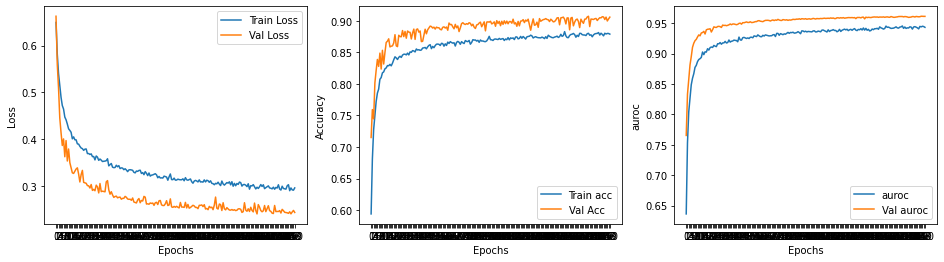

In [10]:
model_1_noise = models.build_cnn_lstm_model_ver3(LSTM,False,cnn_units,lstm_units,0.3,(seq_length,4,1))
history_1_noise = models.train_model(model_1_noise, optimizer, loss_func[0], epochs, batch_size, train_data_1_noise, train_label_1_noise, [early_stopping])

### 5.3 Testing

In [11]:
#testing cnn-lstm model-binary_crossentropy
(prediction_2,predicted_classes_2),(tn_2, fp_2, fn_2, tp_2), (FAR_2,FRR_2,EER_2) =  models.perform_testing(model_1_noise,test_data_1_noise,test_label_1_noise,0.5)

TN:    504,    FP:   96,   FN:   157,   TP:   443
FAR:   0.16,   FRR:   0.26166666666666666,   EER:   0.2375189107413175
